# Probability Density Functions transformations

Given a random variable $X$ with a probability density function $f_x$, consider a transformation of the form $Y = g(X)$. That is, we create a new random variable transforming the outcome of $X$ with the $g$ function. The problem is that the pdf from the new variable, $f_y$, will not just be $f \circ g$, since that composition probably won't even integrate to one over the support. Let's see.

In [36]:
# We can "create" just random variables by using the random objects from numpy
# for example, lets create a Gamma random variable with shape 2 and rate 1/3
from numpy.random import gamma as np_gamma
def X():
    return np_gamma(shape=2, scale=3)  # scale is 1/rate


In [37]:
# X is a random variable, and we can create approximate the pdf (grafically) by creating a lot of
# samples and plotting the histogram. let's create a function that does this.
def plot_pdf(random_variable, num_samples=10000, bins=100):
    import matplotlib.pyplot as plt
    samples = [random_variable() for _ in range(num_samples)]
    plt.hist(samples, bins=bins, density=True)
    plt.title("Approximate PDF of Random Variable")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()

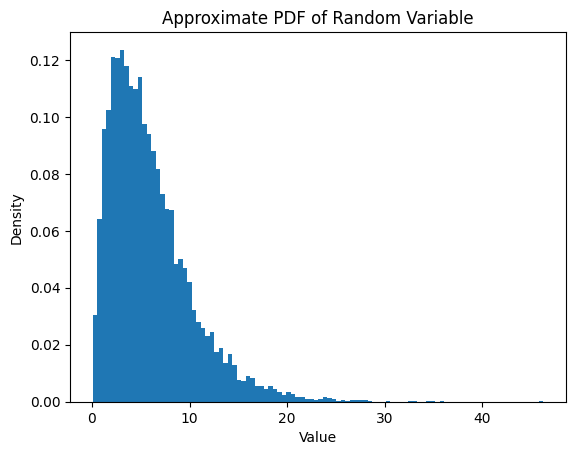

In [38]:
#So, for the X random variable we can plot the approximate pdf by calling the function:
plot_pdf(X)

Now, lets consider the random variable $Y = 1/X$, and let's see the distribution that we must achieve, and yhen compare the composition $f \circ g$

In [39]:
# we create a function for the compostion f g, where f is the pdf from Gamma(2,1/3) and g is 1/x
# gamma comes from scipy.stats
def f_g(x):
    from scipy.stats import gamma
    return gamma.pdf(1/x, a=2, scale=3)  # scale is 1/rate

# We createjust the Y random variable by applying the transformation g(x) = 1/x to X
def Y():
    return 1/X()



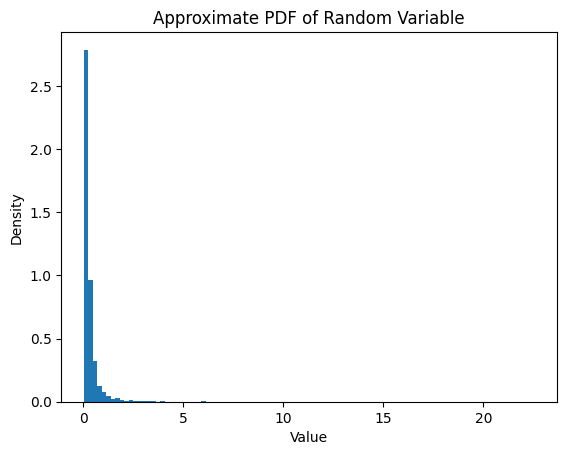

In [40]:
# We plot the approximate pdf of Y by calling the function:
plot_pdf(Y)

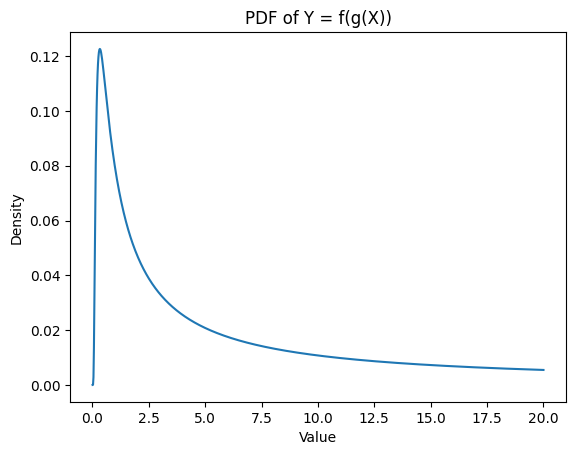

In [41]:
# And then we just plot f_g to see how it looks like
import numpy as np
x_values = np.linspace(0.01, 20, 1000)  # Avoid zero to prevent division issues
y_values = [f_g(x) for x in x_values]
import matplotlib.pyplot as plt
plt.plot(x_values, y_values)
plt.title("PDF of Y = f(g(X))")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

Now, the plots are not alike at all, which means that definetly $f \circ g$ is not the pdf $f_y$ (not even a pdf).
To summarize the proper way to get the $f_y$, let's define the following.

Let's say that $X$ takes values from a set $S$ (support), and that we have the map $g:S \to B$, where $B$ is the set of variables that $Y$ can take. So, we can tell that, given a subset of $B$, $B_1$ and a subset of  $S$, $S_1$, such that $g(S_1) = B_1$ and $g^{-1}(B_1) = S_1$
$$
P[Y \in B_1] = P[X \in S_1] = P[X \in g^{-1}(B_1)] 
$$


Now, assume that both for $X$ and $Y$ we have their respective pdfs $f_x$ and $f_y$. Given that, we know that

$$
 P[X \in S_1] = \int_{S_1} f_x (x) dx
$$
$$
 P[Y \in B_1] = \int_{B_1} f_y (y) dy 
$$

So:

$$
\int_{B_1} f_y (y) dy = \int_{S_1} f_x (x) dx
$$

Now, we can use the variable change described by $g$ on the right, so that instead of x, we use $x = g^{-1}(y)$, and g^{-1}(B_1) instead of S_1, but by the change of variable theorem, we can't just substitude, we must add the factor $\frac{d}{dy} g^{-1}(y)$ into the integral, so:

$$
\int_{S_1} f_x (x) dx = \int_{B_1} f_x ( g^{-1}(y) ) \frac{d}{dy} g^{-1}(y) dy
$$

So

$$
\int_{B_1} f_y (y) dy = \int_{B_1} f_x ( g^{-1}(y) ) \frac{d}{dy} g^{-1}(y) dy
$$

And getting rid of the integrals:

$$
 f_y (y) = f_x ( g^{-1}(y) ) \frac{d}{dy} g^{-1}(y)
$$

So in the previous exaple, if $g(x) = 1/x$, then $g^{-1}(y) = 1/y$ so:

$$
 f_y (y) = G( 1/y,2,3 ) \frac{1}{y^2} = \frac{9}{\Gamma(2)} \left( \frac{1}{y} \right) e^{-3/y}  \frac{1}{y^2} =
 \frac{9}{\Gamma(2)} \left( \frac{1}{y} \right)^{-1} e^{-3/y}
$$

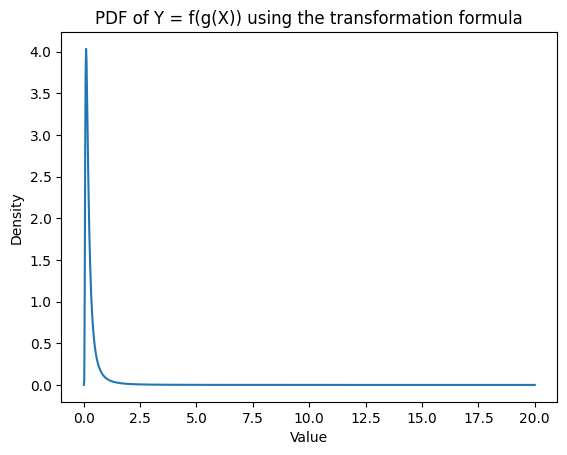

In [42]:
# So we compare qith the new pdf for Y, first defining it
def pdf_Y(y):
    from scipy.stats import gamma
    return gamma.pdf(1/y, a=2, scale=3) * (1/y**2)

# And then we just plot it to see how it looks like
y_values_pdf_Y = [pdf_Y(x) for x in x_values]
plt.plot(x_values, y_values_pdf_Y)
plt.title("PDF of Y = f(g(X)) using the transformation formula")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

For the specific gamma distribution that we used, the new dist obtained $f_y$ is called inverse gamma